# Exploraci√≥n y Predicci√≥n de la Incidencia Delictiva en la CDMX (2015-2025)

![uami](./figuras/uami.png)

**Maestr√≠a en Matem√°ticas Aplicadas**

Alan Badillo Salas (cbi2242800355@xanum.uam.mx)

> T√≥picos Selectos de Matem√°ticas Aplicadas II
> An√°lisis de Datos (2138002)
> 
> **Proyecto Final**
> 
> *Trimestre: 25-P*
>
> Profesor: Dr. Juan Alberto Mart√≠nez Cadena

## Librer√≠as

In [1]:
import numpy
import pandas

import matplotlib.pyplot as pyplot
import seaborn

## Fase 1 - Preparaci√≥n de los datos

Carga de los datos.

Fuente: [datos.gob.mx](https://datos.gob.mx/dataset/incidencia_delictiva)

[![fig1](figuras/fig1.png)](https://datos.gob.mx/dataset/incidencia_delictiva)

In [2]:
incidencias = pandas.read_csv("conjuntos/IDM_NM_jun25.csv", encoding="latin1")

incidencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562994 entries, 0 to 2562993
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   A√±o                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jur√≠dico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Enero                   int64  
 10  Febrero                 int64  
 11  Marzo                   int64  
 12  Abril                   int64  
 13  Mayo                    int64  
 14  Junio                   int64  
 15  Julio                   float64
 16  Agosto                  float64
 17  Septiembre              float64
 18  Octubre                 float64
 19  Noviembre               float64
 20  Diciembre               float64
dtypes: float64(6), int64(9), obje

Hay $2,562,994$ (dos millones, quinientos sesenta y dos mil, novecientos noventa y cuatro) registros de hecho delictivos ocurridos en M√©xico, entre el 2015 y junio del 2025.

### Conversi√≥n del formato ancho a largo

**Diagn√≥stico**: Se observa que cada fila codifica 12 columnas de los meses (Enero, ..., Diciembre)

**Estrategia**: Aplicar `melt` para extraer en formato largo los meses y luego fusionar los datos restantes

> Se observa que cada fila tiene 12 meses

In [3]:
incidencias.head()

A√±o  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2015          1  Aguascalientes            1001  Aguascalientes   
1  2015          1  Aguascalientes            1001  Aguascalientes   
2  2015          1  Aguascalientes            1001  Aguascalientes   
3  2015          1  Aguascalientes            1001  Aguascalientes   
4  2015          1  Aguascalientes            1001  Aguascalientes   

             Bien jur√≠dico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      1      1     0      1    1.0     0.0   
1    Con arma blanca      1  ...      0      0     0      1    0.0     1.0   
2  Con otro elemento      0  ...      1      1     3      2    0.0     1.0   
3    No especificado      1  ...      0      1     0      0    0.0     0.0   
4  Con arma de fuego      0  ...      0      0     1      0    0.0     0.0   

   Septiembre  Octubre  Noviembre  Diciembre  
0         2.0      1.0        0.0        1.0  
1         0.0      0.0        0.0        0.0  
2         2.0      0.0        0.0        0.0  
3         0.0      0.0        0.0        0.0  
4         0.0      0.0        0.0        0.0  

[5 rows x 21 columns]

> Se extraen las columnas 9, 10, ... (Enero, Febrero, ...)

En los √∫ltimos meses del 2025 no hay datos, por lo que se rellena a 0 y se determinan conteos enteros, adem√°s se guarda el √≠ndice de cada fila

In [4]:
meses_ancho = incidencias.iloc[:, 9:].fillna(0).astype(int)
meses_ancho["id"] = meses_ancho.index

meses_ancho.head()

Enero  Febrero  Marzo  Abril  Mayo  Junio  Julio  Agosto  Septiembre  \
0      2        0      1      1     0      1      1       0           2   
1      1        1      0      0     0      1      0       1           0   
2      0        0      1      1     3      2      0       1           2   
3      1        0      0      1     0      0      0       0           0   
4      0        0      0      0     1      0      0       0           0   

   Octubre  Noviembre  Diciembre  id  
0        1          0          1   0  
1        0          0          0   1  
2        0          0          0   2  
3        0          0          0   3  
4        0          0          0   4

> Aplicamos un `melt` para convertir cada fila al formato largo

* `id_vars` - Nombre de la columna con los √≠ndices
* `var_name` - Nombre de la columna de reducci√≥n (columnas contra√≠das)
* `var_value` - Nombre de la columna de los valores

In [5]:
meses_largo = meses_ancho.melt(id_vars="id", var_name="Mes", value_name="Total").set_index("id")

meses_largo.head()

Mes  Total
id              
0   Enero      2
1   Enero      1
2   Enero      0
3   Enero      1
4   Enero      0

In [6]:
meses_largo.shape

(30755928, 2)

**Diagn√≥stico:** Se tienen 30,755,928 registros, derivados de los meses en forma largo

**Estrategia:** Fusionar los datos originales con los meses en formato largo

In [10]:
delitos = meses_largo.join(incidencias.iloc[:, :9])

delitos.head()

Mes  Total   A√±o  Clave_Ent         Entidad  Cve. Municipio  \
id                                                                  
0   Enero      2  2015          1  Aguascalientes            1001   
1   Enero      1  2015          1  Aguascalientes            1001   
2   Enero      0  2015          1  Aguascalientes            1001   
3   Enero      1  2015          1  Aguascalientes            1001   
4   Enero      0  2015          1  Aguascalientes            1001   

         Municipio            Bien jur√≠dico afectado Tipo de delito  \
id                                                                    
0   Aguascalientes  La vida y la Integridad corporal      Homicidio   
1   Aguascalientes  La vida y la Integridad corporal      Homicidio   
2   Aguascalientes  La vida y la Integridad corporal      Homicidio   
3   Aguascalientes  La vida y la Integridad corporal      Homicidio   
4   Aguascalientes  La vida y la Integridad corporal      Homicidio   

    Subtipo de delito          Modalidad  
id                                        
0    Homicidio doloso  Con arma de fuego  
1    Homicidio doloso    Con arma blanca  
2    Homicidio doloso  Con otro elemento  
3    Homicidio doloso    No especificado  
4   Homicidio culposo  Con arma de fuego

In [11]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30755928 entries, 0 to 2562993
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Mes                     object
 1   Total                   int64 
 2   A√±o                     int64 
 3   Clave_Ent               int64 
 4   Entidad                 object
 5   Cve. Municipio          int64 
 6   Municipio               object
 7   Bien jur√≠dico afectado  object
 8   Tipo de delito          object
 9   Subtipo de delito       object
 10  Modalidad               object
dtypes: int64(4), object(7)
memory usage: 2.7+ GB


Ahora se tienen $30,755,928$ (treinta millones, setecientos cincuenta y cinco mil, novecientos veintiocho) registros de hecho delictivos ocurridos en M√©xico, entre el 2015 y junio del 2025.

**N√∫mero de delitos registrados reales.**

In [12]:
delitos["Mes_num"] = delitos["Mes"].map({
    "Enero": 1,
    "Febrero": 2,
    "Marzo": 3,
    "Abril": 4,
    "Mayo": 5,
    "Junio": 6,
    "Julio": 7,
    "Agosto": 8,
    "Septiembre": 9,
    "Octubre": 10,
    "Noviembre": 11,
    "Diciembre": 12,
})

delitos.head()

Mes  Total   A√±o  Clave_Ent         Entidad  Cve. Municipio  \
id                                                                  
0   Enero      2  2015          1  Aguascalientes            1001   
1   Enero      1  2015          1  Aguascalientes            1001   
2   Enero      0  2015          1  Aguascalientes            1001   
3   Enero      1  2015          1  Aguascalientes            1001   
4   Enero      0  2015          1  Aguascalientes            1001   

         Municipio            Bien jur√≠dico afectado Tipo de delito  \
id                                                                    
0   Aguascalientes  La vida y la Integridad corporal      Homicidio   
1   Aguascalientes  La vida y la Integridad corporal      Homicidio   
2   Aguascalientes  La vida y la Integridad corporal      Homicidio   
3   Aguascalientes  La vida y la Integridad corporal      Homicidio   
4   Aguascalientes  La vida y la Integridad corporal      Homicidio   

    Subtipo de delito          Modalidad  Mes_num  
id                                                 
0    Homicidio doloso  Con arma de fuego        1  
1    Homicidio doloso    Con arma blanca        1  
2    Homicidio doloso  Con otro elemento        1  
3    Homicidio doloso    No especificado        1  
4   Homicidio culposo  Con arma de fuego        1

### Total de Delitos por Entidad

In [18]:
reporte1 = delitos[["Entidad", "Total"]].groupby("Entidad").sum()
reporte1

Total
Entidad                                 
Aguascalientes                    371883
Baja California                  1120676
Baja California Sur               234023
Campeche                           85081
Chiapas                           207315
Chihuahua                         732127
Ciudad de M√©xico                 2253145
Coahuila de Zaragoza              588000
Colima                            243624
Durango                           291960
Guanajuato                       1375350
Guerrero                          302488
Hidalgo                           486070
Jalisco                          1415356
Michoac√°n de Ocampo               455512
Morelos                           469922
M√©xico                           3751094
Nayarit                            71014
Nuevo Le√≥n                        901768
Oaxaca                            374389
Puebla                            721502
Quer√©taro                         563169
Quintana Roo                      432791
San Luis Potos√≠                   479020
Sinaloa                           287477
Sonora                            326575
Tabasco                           542595
Tamaulipas                        434817
Tlaxcala                           54563
Veracruz de Ignacio de la Llave   764277
Yucat√°n                           154947
Zacatecas                         234984

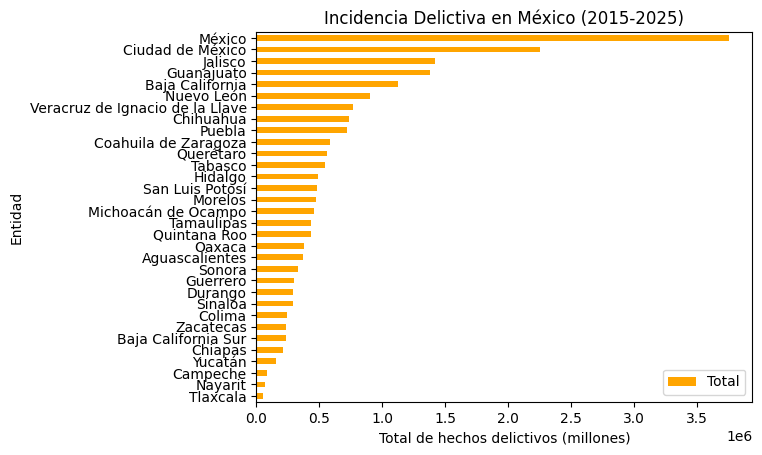

In [42]:
reporte1.sort_values(by="Total").plot.barh(color="orange")
pyplot.title("Incidencia Delictiva en M√©xico (2015-2025)")
pyplot.xlabel("Total de hechos delictivos (millones)")
pyplot.savefig("figuras/reporte1.png")
pyplot.show()

El Estado de M√©xico, la Ciudad de M√©xico, Jalisco, Guanajuato, Baja California y Nuevo Le√≥n son las entidades con mayor n√∫mero de hechos delictivos. Mientras que Tlaxcala, Nayarit, Campeche, Yucat√°n, Chiapas y Baja California Sur son las entidades con el menor n√∫mero de hechos delictivos (ocurridos entre el 2015 y Junio del 2025).

### An√°lisis para la Ciudad de M√©xico

In [23]:
delitos_cdmx = delitos[delitos["Entidad"] == "Ciudad de M√©xico"].copy().reset_index()

delitos_cdmx.head()

id    Mes  Total   A√±o  Clave_Ent           Entidad  Cve. Municipio  \
0  25970  Enero      4  2015          9  Ciudad de M√©xico            9002   
1  25971  Enero      1  2015          9  Ciudad de M√©xico            9002   
2  25972  Enero      2  2015          9  Ciudad de M√©xico            9002   
3  25973  Enero      0  2015          9  Ciudad de M√©xico            9002   
4  25974  Enero      0  2015          9  Ciudad de M√©xico            9002   

      Municipio            Bien jur√≠dico afectado Tipo de delito  \
0  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
1  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
2  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
3  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
4  Azcapotzalco  La vida y la Integridad corporal      Homicidio   

   Subtipo de delito          Modalidad  Mes_num  
0   Homicidio doloso  Con arma de fuego        1  
1   Homicidio doloso    Con arma blanca        1  
2   Homicidio doloso  Con otro elemento        1  
3   Homicidio doloso    No especificado        1  
4  Homicidio culposo  Con arma de fuego        1

In [24]:
delitos_cdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219912 entries, 0 to 219911
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      219912 non-null  int64 
 1   Mes                     219912 non-null  object
 2   Total                   219912 non-null  int64 
 3   A√±o                     219912 non-null  int64 
 4   Clave_Ent               219912 non-null  int64 
 5   Entidad                 219912 non-null  object
 6   Cve. Municipio          219912 non-null  int64 
 7   Municipio               219912 non-null  object
 8   Bien jur√≠dico afectado  219912 non-null  object
 9   Tipo de delito          219912 non-null  object
 10  Subtipo de delito       219912 non-null  object
 11  Modalidad               219912 non-null  object
 12  Mes_num                 219912 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 21.8+ MB


Hay $219,912$ (docientos diescinueve mil, novecientos doce) registros.

> Solo delitos de la Ciudad de M√©xico

In [27]:
delitos_cdmx.to_csv("conjuntos/delitos_cdmx.csv", index=False)

## Fase 2 - An√°lisis exploratorio

In [28]:
delitos_cdmx = pandas.read_csv("conjuntos/delitos_cdmx.csv")

delitos_cdmx.head()

id    Mes  Total   A√±o  Clave_Ent           Entidad  Cve. Municipio  \
0  25970  Enero      4  2015          9  Ciudad de M√©xico            9002   
1  25971  Enero      1  2015          9  Ciudad de M√©xico            9002   
2  25972  Enero      2  2015          9  Ciudad de M√©xico            9002   
3  25973  Enero      0  2015          9  Ciudad de M√©xico            9002   
4  25974  Enero      0  2015          9  Ciudad de M√©xico            9002   

      Municipio            Bien jur√≠dico afectado Tipo de delito  \
0  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
1  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
2  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
3  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
4  Azcapotzalco  La vida y la Integridad corporal      Homicidio   

   Subtipo de delito          Modalidad  Mes_num  
0   Homicidio doloso  Con arma de fuego        1  
1   Homicidio doloso    Con arma blanca        1  
2   Homicidio doloso  Con otro elemento        1  
3   Homicidio doloso    No especificado        1  
4  Homicidio culposo  Con arma de fuego        1

In [32]:
reporte2 = delitos_cdmx[["Entidad", "Total"]].groupby("Entidad").sum()
reporte2

Total
Entidad                  
Ciudad de M√©xico  2253145

Se registraron un total de $2,253,145$ (dos millones, doscientos cincuenta y tres mil, ciento cuarenta y cinco) hecho delictivos en la Ciudad de M√©xico, ocurridos entre el 2015 y junio del 2025.

### Incidencia Delictiva en la Ciudad de M√©xico por Alcald√≠a (2015-2025)

In [38]:
reporte3 = delitos_cdmx[["Municipio", "Total"]].groupby("Municipio").sum().sort_values("Total")
reporte3

Total
Municipio                     
Milpa Alta               19627
No Especificado          23769
Cuajimalpa de Morelos    36331
La Magdalena Contreras   39872
Tl√°huac                  62452
Xochimilco               74156
Iztacalco                97760
Azcapotzalco            108480
Venustiano Carranza     126474
Tlalpan                 137137
Miguel Hidalgo          143092
√Ålvaro Obreg√≥n          151245
Coyoac√°n                155173
Benito Ju√°rez           178569
Gustavo A. Madero       226710
Iztapalapa              329603
Cuauht√©moc              342695

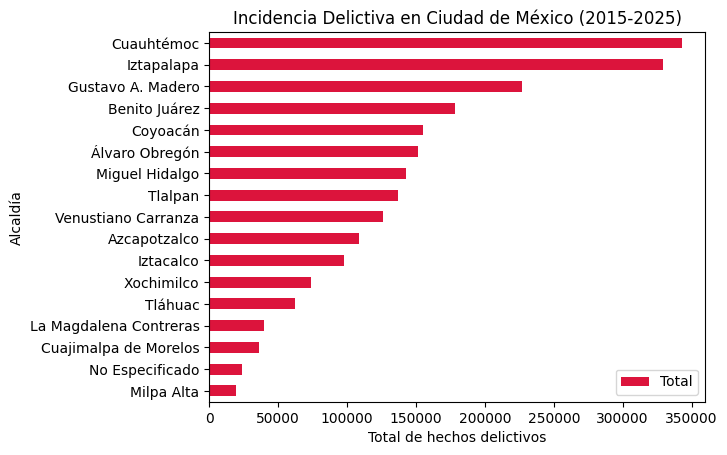

In [45]:
reporte3.plot.barh(color="crimson")
pyplot.title("Incidencia Delictiva en Ciudad de M√©xico (2015-2025)")
pyplot.xlabel("Total de hechos delictivos")
pyplot.ylabel("Alcald√≠a")
pyplot.savefig("figuras/reporte3.png")
pyplot.show()

Las alcald√≠as de Cuaht√©moc, Iztapalapa y Gustavo A. Madero son las que tienen mayor n√∫mero de incidentes delictivos, mientras que Milpa Alta, Cuajimalpa de Morelos y la Magdalena Contreras son las de menor incidencia (del 2015 a junio del 2025).

> An√°lisis por a√±o

In [100]:
reporte4 = delitos_cdmx[["A√±o", "Municipio", "Total"]].groupby(["A√±o", "Municipio"]).sum().sort_values("Total").unstack().droplevel(axis=1, level=0).T
reporte4["2025*"] = 2 * reporte4[2025]
del reporte4[2025]
reporte4["Total"] = reporte4.sum(axis=1)
reporte4 = reporte4.sort_values("Total")
reporte4

A√±o                      2015   2016   2017   2018   2019   2020   2021  \
Municipio                                                                 
Milpa Alta               1163   1080   1303   1708   1641   1711   2371   
No Especificado           547    896    609    985      0     47    597   
Cuajimalpa de Morelos    2560   2657   2857   3326   3787   3251   3872   
La Magdalena Contreras   2330   2811   3016   3471   4007   3959   4397   
Tl√°huac                  3589   3901   4765   5724   6000   5761   7007   
Xochimilco               6021   5947   6472   7385   7440   6854   7503   
Iztacalco                7342   7397   8700  10502  10244   7908   9287   
Azcapotzalco             8879   9509  10676  11889  10822  10110  11298   
Venustiano Carranza      9156   9696  10930  13875  14419  11487  12644   
Tlalpan                  9887  11108  11773  13726  14533  12281  13867   
Miguel Hidalgo          11168  11766  14620  16056  16214  12420  13590   
√Ålvaro Obreg√≥n          10691  11156  12922  15999  17974  14580  15951   
Coyoac√°n                12262  12754  13836  16249  15725  13238  15564   
Benito Ju√°rez           12848  15275  18746  21795  20601  14848  16046   
Gustavo A. Madero       18213  17766  20285  24208  24228  21006  23251   
Iztapalapa              26264  27263  30234  35650  38186  30723  32842   
Cuauht√©moc              26781  28738  32334  38481  37017  27971  33655   

A√±o                      2022   2023   2024  2025*   Total  
Municipio                                                   
Milpa Alta               2646   2369   2449   2372   20813  
No Especificado           585   7340   8065   8196   27867  
Cuajimalpa de Morelos    3980   4294   3894   3706   38184  
La Magdalena Contreras   4652   4823   4533   3746   41745  
Tl√°huac                  7638   7691   6952   6848   65876  
Xochimilco               7956   7931   7251   6792   77552  
Iztacalco               11015  10466   9941   9916  102718  
Azcapotzalco            11555  10201   9353   8376  112668  
Venustiano Carranza     12973  13174  12295  11650  132299  
Tlalpan                 14317  14440  14640  13130  143702  
Miguel Hidalgo          13644  13873  13243  12996  149590  
√Ålvaro Obreg√≥n          15473  15609  14163  13454  157972  
Coyoac√°n                16696  16267  15507  14150  162248  
Benito Ju√°rez           16791  17165  16987  14934  186036  
Gustavo A. Madero       23635  23001  21335  19564  236492  
Iztapalapa              33186  32444  29182  27258  343232  
Cuauht√©moc              35902  33386  32561  31738  358564

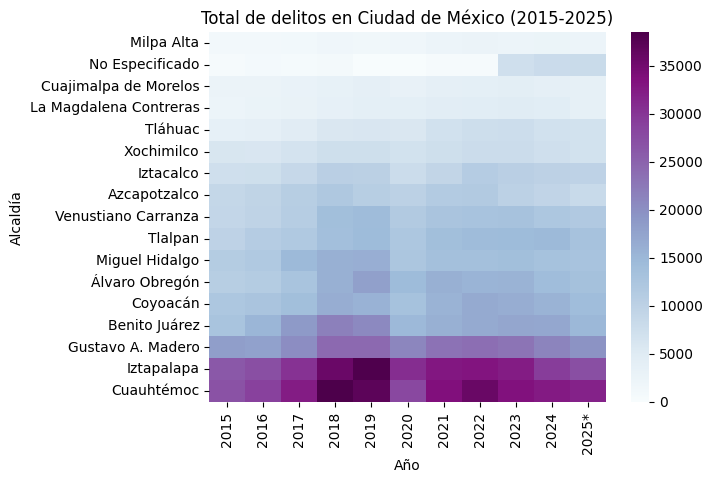

In [101]:
seaborn.heatmap(reporte4.iloc[:,:-1], cmap="BuPu")
pyplot.title("Total de delitos en Ciudad de M√©xico (2015-2025)")
pyplot.xlabel("A√±o")
pyplot.ylabel("Alcald√≠a")
pyplot.xticks(rotation=90)
pyplot.savefig("figuras/reporte4.png")
pyplot.show()

Se observa un patr√≥n de bajas en el a√±o $2020$, toda una franja de color m√°s suave (bajo), lo que significa una disminuci√≥n de los delitos en todas las alcad√≠as, explicada por la pandemia del COVID-19.

**Nota:** Se ajustaron los datos del a√±o $2025$ en un m√∫ltiplo de 2, ya que los datos llegan a junio.

### Tendencia anual y mensual

> An√°lisis temporal (a√±o y mes) del total de delitos

In [151]:
reporte5 = delitos_cdmx[["A√±o", "Mes_num", "Total"]].groupby(["A√±o", "Mes_num"]).sum().reset_index()
reporte5 = reporte5[reporte5["Total"] > 0]
reporte5.index = pandas.PeriodIndex.from_fields(year=reporte5["A√±o"], month=reporte5["Mes_num"], freq="M")
del reporte5["A√±o"]
del reporte5["Mes_num"]

reporte5.head()

Total
2015-01  12202
2015-02  12433
2015-03  14271
2015-04  13882
2015-05  14250

In [159]:
reporte6 = reporte5.groupby(reporte5.index.year).sum()
reporte6.loc[2025] = 2 * reporte6.loc[2025]
index = list(reporte6.index)
index[-1] = "2025*"
reporte6.index = index
reporte6

Total
2015   169701
2016   179720
2017   204078
2018   241029
2019   242838
2020   198155
2021   223742
2022   232644
2023   234474
2024   222351
2025*  208826

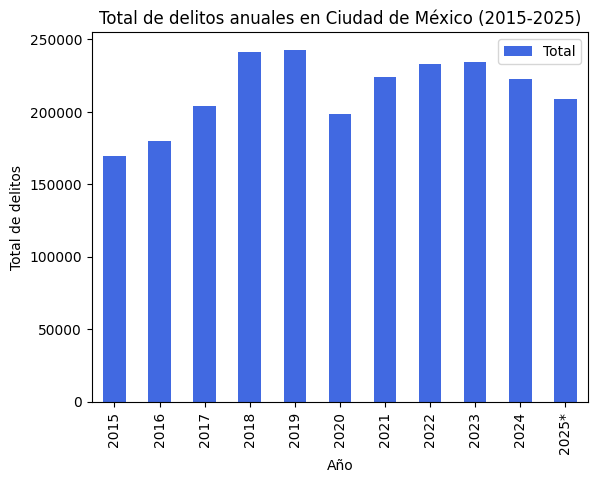

In [235]:
reporte6.plot.bar(color="royalblue")
# reporte6.plot(marker=".", linestyle=":", mfc="red", mec="crimson", figsize=(15, 5))
pyplot.title("Total de delitos anuales en Ciudad de M√©xico (2015-2025)")
pyplot.xlabel("A√±o")
pyplot.ylabel("Total de delitos")
pyplot.savefig("figuras/reporte6.png")
pyplot.show()

In [174]:
reporte7 = reporte5.copy()
reporte7.index = reporte7.index.to_timestamp()
reporte7 = reporte7.resample("MS").sum()
reporte7

Total
2015-01-01  12202
2015-02-01  12433
2015-03-01  14271
2015-04-01  13882
2015-05-01  14250
...           ...
2025-02-01  16163
2025-03-01  18552
2025-04-01  17690
2025-05-01  18536
2025-06-01  16933

[126 rows x 1 columns]

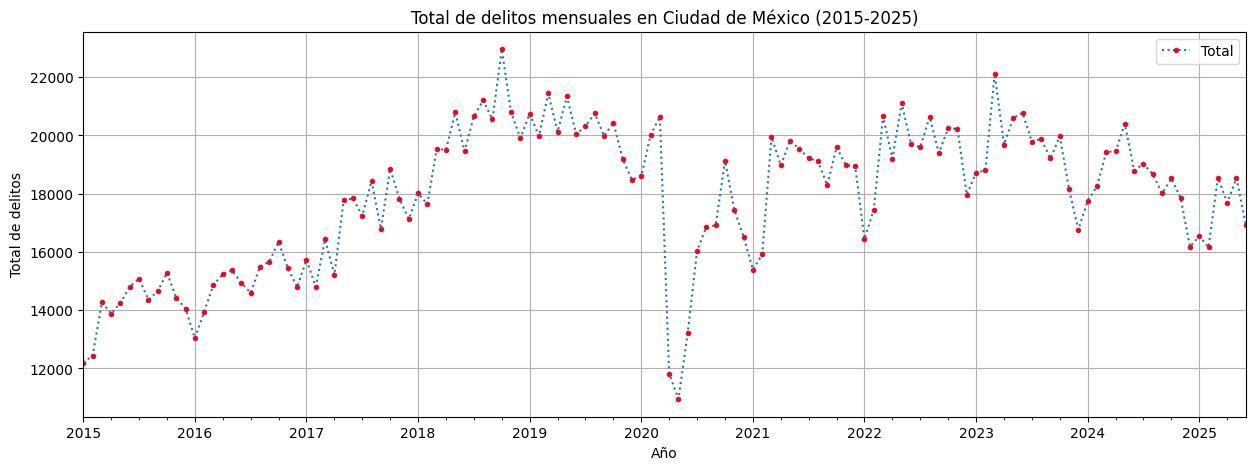

In [225]:
reporte7.plot(marker=".", linestyle=":", mfc="red", mec="crimson", figsize=(15, 5))
pyplot.title("Total de delitos mensuales en Ciudad de M√©xico (2015-2025)")
pyplot.xlabel("A√±o")
pyplot.ylabel("Total de delitos")
# pyplot.ylim(0, reporte7["Total"].max() + 5_000)
pyplot.grid()
pyplot.savefig("figuras/reporte7.png")
pyplot.show()

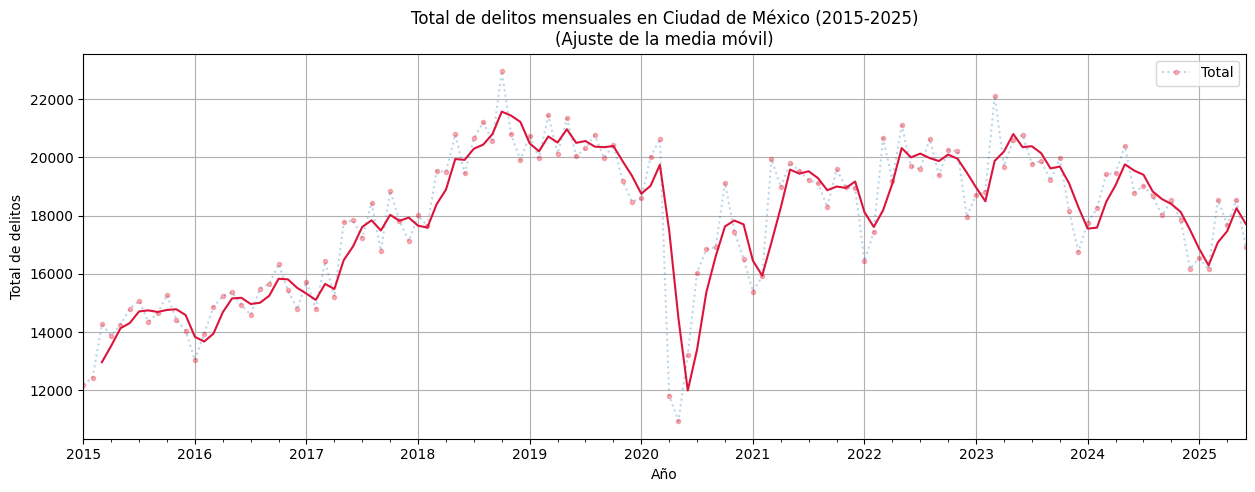

In [224]:
reporte8 = reporte7.copy()
s = reporte8["Total"].rolling(window=3).mean()
reporte8.plot(marker=".", linestyle=":", mfc="red", mec="crimson", figsize=(15, 5), alpha=0.3)
pandas.Series(s).plot(color="crimson")
pyplot.title("Total de delitos mensuales en Ciudad de M√©xico (2015-2025)\n(Ajuste de la media m√≥vil)")
pyplot.xlabel("A√±o")
pyplot.ylabel("Total de delitos")
# pyplot.ylim(0, reporte7["Total"].max() + 5_000)
pyplot.grid()
pyplot.savefig("figuras/reporte8.png")
pyplot.show()

Se observa que los delitos bajan a principios de a√±o (se podr√≠a deber a que hay m√°s operativos policiacos entre el 24 de diciembre y el primero de enero), y se corrobora que los delitos bajaron en 2020 cuando fue anunciada la llegada de la pandemia COVID-19 a M√©xico.

### Tipos de delitos

In [253]:
reporte9 = delitos_cdmx[["Tipo de delito", "Subtipo de delito", "Total"]].groupby(["Tipo de delito", "Subtipo de delito"]).sum().sort_values("Total")
reporte9

Total
Tipo de delito                                     Subtipo de delito                                         
Robo                                               Robo de ganado                                           0
Violencia de g√©nero en todas sus modalidades di... Violencia de g√©nero en todas sus modalidades di...       0
Hostigamiento sexual                               Hostigamiento sexual                                     0
Incesto                                            Incesto                                                  2
Tr√°fico de menores                                 Tr√°fico de menores                                      24
Rapto                                              Rapto                                                   62
Evasi√≥n de presos                                  Evasi√≥n de presos                                      162
Robo                                               Robo de maquinaria                                     166
                                                   Robo a instituci√≥n bancaria                            214
Feminicidio                                        Feminicidio                                            623
Secuestro                                          Secuestro                                              812
Trata de personas                                  Trata de personas                                     1005
Aborto                                             Aborto                                                1427
Robo                                               Robo a transportista                                  1474
Corrupci√≥n de menores                              Corrupci√≥n de menores                                 2672
Electorales                                        Electorales                                           2823
Otros delitos contra la familia                    Otros delitos contra la familia                       2883
Robo                                               Robo en transporte p√∫blico individual                 5155
Falsedad                                           Falsedad                                              5615
Extorsi√≥n                                          Extorsi√≥n                                             5974
Otros delitos que atentan contra la vida y la i... Otros delitos que atentan contra la vida y la i...    6328
Homicidio                                          Homicidio culposo                                     7330
Violaci√≥n equiparada                               Violaci√≥n equiparada                                  8019
Incumplimiento de obligaciones de asistencia fa... Incumplimiento de obligaciones de asistencia fa...    8340
Allanamiento de morada                             Allanamiento de morada                                8398
Otros delitos que atentan contra la libertad y ... Otros delitos que atentan contra la libertad y ...    8778
Violaci√≥n simple                                   Violaci√≥n simple                                      8966
Contra el medio ambiente                           Contra el medio ambiente                              9245
Acoso sexual                                       Acoso sexual                                          9882
Homicidio                                          Homicidio doloso                                     10240
Otros delitos contra la sociedad                   Otros delitos contra la sociedad                     12744
Otros delitos que atentan contra la libertad pe... Otros delitos que atentan contra la libertad pe...   15314
Robo                                               Robo a transe√∫nte en espacio abierto al p√∫blico      18667
                                                   Robo en transporte individual                        22631
Otros delitos contra el patrimonio                 Otros delitos contra el patrimonio                   29111
Abuso sexual    

**Diagn√≥stico:** Hay 44 tipos de delitos y 55 subtipos, la mayor√≠a corresponde su tipo y subtipo

**Estrategia:** Se tomar√°n solo los subtipos y se har√° una reclasificaci√≥n de los grupos de delitos

> Grupos de subtipos de delitos

üîê Grupo: Robos (13 delitos)
- Robo de ganado
- Robo de maquinaria
- Robo a instituci√≥n bancaria
- Robo a transportista
- Robo en transporte p√∫blico individual
- Robo en transporte p√∫blico colectivo
- Robo en transporte individual
- Robo a transe√∫nte en espacio abierto al p√∫blico
- Robo a casa habitaci√≥n
- Robo de autopartes
- Robo de veh√≠culo automotor
- Robo a transe√∫nte en v√≠a p√∫blica
- Robo a negocio
- Otros robos

üí∏ Grupo: Fraude, falsificaci√≥n y confianza (5 delitos)
- Abuso de confianza
- Fraude
- Falsificaci√≥n
- Extorsi√≥n
- Despojo

üßë‚Äç‚öñÔ∏è Grupo: Delitos sexuales (7 delitos)
- Acoso sexual
- Abuso sexual
- Hostigamiento sexual
- Violaci√≥n simple
- Violaci√≥n equiparada
- Incesto
- Feminicidio

üßë‚Äçüßí Grupo: Familia, g√©nero y personas vulnerables (6 delitos)
- Violencia familiar
- Violencia de g√©nero en todas sus modalidades distinta a la violencia familiar
- Corrupci√≥n de menores
- Amenazas

‚ò†Ô∏è Grupo: Contra la vida e integridad (6 delitos)
- Homicidio doloso
- Homicidio culposo
- Lesiones dolosas
- Lesiones culposas
- Otros delitos que atentan contra la vida y la integridad corporal
- Aborto

üëÆ Grupo: Contra la libertad personal (4 delitos)
- Secuestro
- Allanamiento de morada
- Otros delitos que atentan contra la libertad y la seguridad sexual
- Otros delitos que atentan contra la libertad personal
- Tr√°fico de menores
- Rapto
- Trata de personas

üßë‚Äç‚öñÔ∏è Grupo: Delitos contra la autoridad y la fe p√∫blica (4 delitos)
- Delitos cometidos por servidores p√∫blicos
- Electorales
- Falsedad
- Evasi√≥n de presos
- Narcomenudeo

üå≥ Grupo: Sociedad y medio ambiente (4 delitos)
- Contra el medio ambiente
- Da√±o a la propiedad
- Otros delitos contra la sociedad
- Otros delitos del Fuero Com√∫n

üèõÔ∏è Grupo: Otros delitos contra estructuras sociales (3 delitos)
- Incumplimiento de obligaciones de asistencia familiar
- Otros delitos contra la familia
- Otros delitos contra el patrimonio

In [276]:
grupo_delito = {
    "Robos": [
        "Robo de ganado",
        "Robo de maquinaria",
        "Robo a instituci√≥n bancaria",
        "Robo a transportista",
        "Robo en transporte p√∫blico individual",
        "Robo en transporte p√∫blico colectivo",
        "Robo en transporte individual",
        "Robo a transe√∫nte en espacio abierto al p√∫blico",
        "Robo a casa habitaci√≥n",
        "Robo de autopartes",
        "Robo de veh√≠culo automotor",
        "Robo a transe√∫nte en v√≠a p√∫blica",
        "Robo a negocio",
        "Otros robos",
    ],
    "Fraude": [
        "Abuso de confianza",
        "Fraude",
        "Falsificaci√≥n",
        "Extorsi√≥n",
        "Despojo",
    ],
    "Sexuales": [
        "Acoso sexual",
        "Abuso sexual",
        "Hostigamiento sexual",
        "Violaci√≥n simple",
        "Violaci√≥n equiparada",
        "Incesto",
        "Feminicidio",
    ],
    "Personas": [
        "Violencia familiar",
        "Violencia de g√©nero en todas sus modalidades distinta a la violencia familiar",
        "Corrupci√≥n de menores",
        "Amenazas",
    ],
    "Homicidios": [
        "Homicidio doloso",
        "Homicidio culposo",
        "Lesiones dolosas",
        "Lesiones culposas",
        "Otros delitos que atentan contra la vida y la integridad corporal",
        "Aborto",
    ],
    "Secuestro": [
        "Secuestro",
        "Allanamiento de morada",
        "Otros delitos que atentan contra la libertad y la seguridad sexual",
        "Otros delitos que atentan contra la libertad personal",
        "Tr√°fico de menores",
        "Rapto",
        "Trata de personas",
    ],
    "Gobierno": [
        "Delitos cometidos por servidores p√∫blicos",
        "Electorales",
        "Falsedad",
        "Evasi√≥n de presos",
        "Narcomenudeo"
    ],
    "Ambiente": [
        "Contra el medio ambiente",
        "Da√±o a la propiedad",
        "Otros delitos contra la sociedad",
        "Otros delitos del Fuero Com√∫n",
    ],
    "Sociales": [
        "Incumplimiento de obligaciones de asistencia familiar",
        "Otros delitos contra la familia",
        "Otros delitos contra el patrimonio",
    ],
}

In [277]:
delitos_cdmx["grupo_delito"] = "NA"

for i in delitos_cdmx.index:
    subtipo = delitos_cdmx.loc[i, "Subtipo de delito"]
    for grupo in grupo_delito:
        if subtipo in grupo_delito[grupo]:
            delitos_cdmx.loc[i, "grupo_delito"] = grupo

delitos_cdmx.head()

id    Mes  Total   A√±o  Clave_Ent           Entidad  Cve. Municipio  \
0  25970  Enero      4  2015          9  Ciudad de M√©xico            9002   
1  25971  Enero      1  2015          9  Ciudad de M√©xico            9002   
2  25972  Enero      2  2015          9  Ciudad de M√©xico            9002   
3  25973  Enero      0  2015          9  Ciudad de M√©xico            9002   
4  25974  Enero      0  2015          9  Ciudad de M√©xico            9002   

      Municipio            Bien jur√≠dico afectado Tipo de delito  \
0  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
1  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
2  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
3  Azcapotzalco  La vida y la Integridad corporal      Homicidio   
4  Azcapotzalco  La vida y la Integridad corporal      Homicidio   

   Subtipo de delito          Modalidad  Mes_num grupo_delito  
0   Homicidio doloso  Con arma de fuego        1   Homicidios  
1   Homicidio doloso    Con arma blanca        1   Homicidios  
2   Homicidio doloso  Con otro elemento        1   Homicidios  
3   Homicidio doloso    No especificado        1   Homicidios  
4  Homicidio culposo  Con arma de fuego        1   Homicidios

> Verificaci√≥n de grupos no v√°lidos

In [278]:
delitos_cdmx[delitos_cdmx["grupo_delito"] == "NA"]["Subtipo de delito"].unique()

array([], dtype=object)

> Versi√≥n con grupos manuales

In [279]:
delitos_cdmx.to_csv("conjuntos/delitos_cdmx_grupo.csv", index=False)

> Concentrado para grupo de delitos (General)

Homicidios


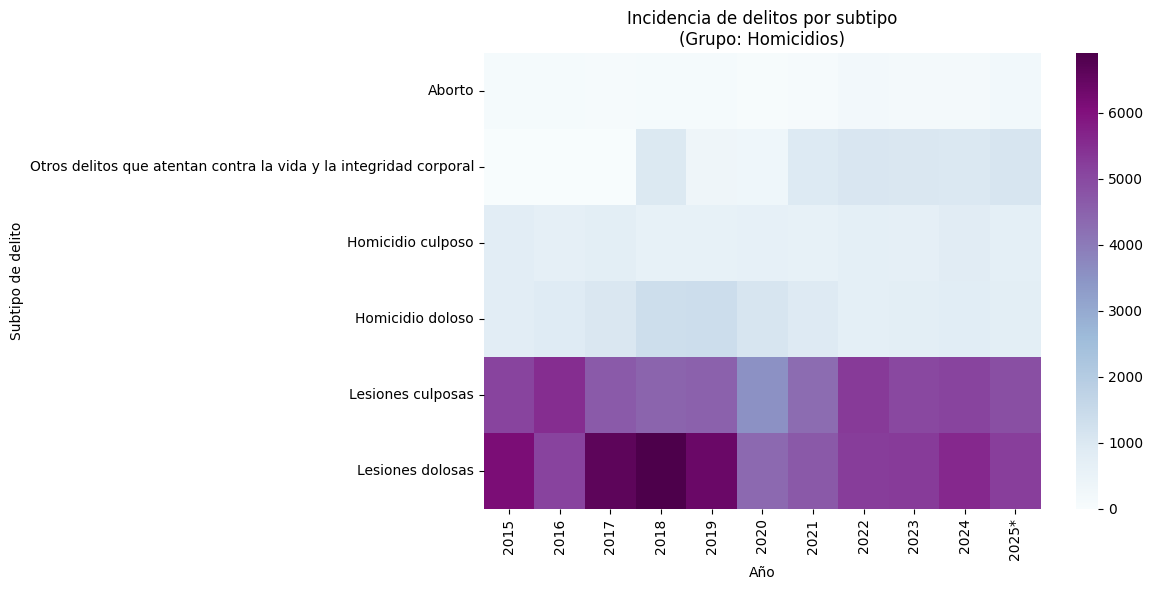

Sexuales


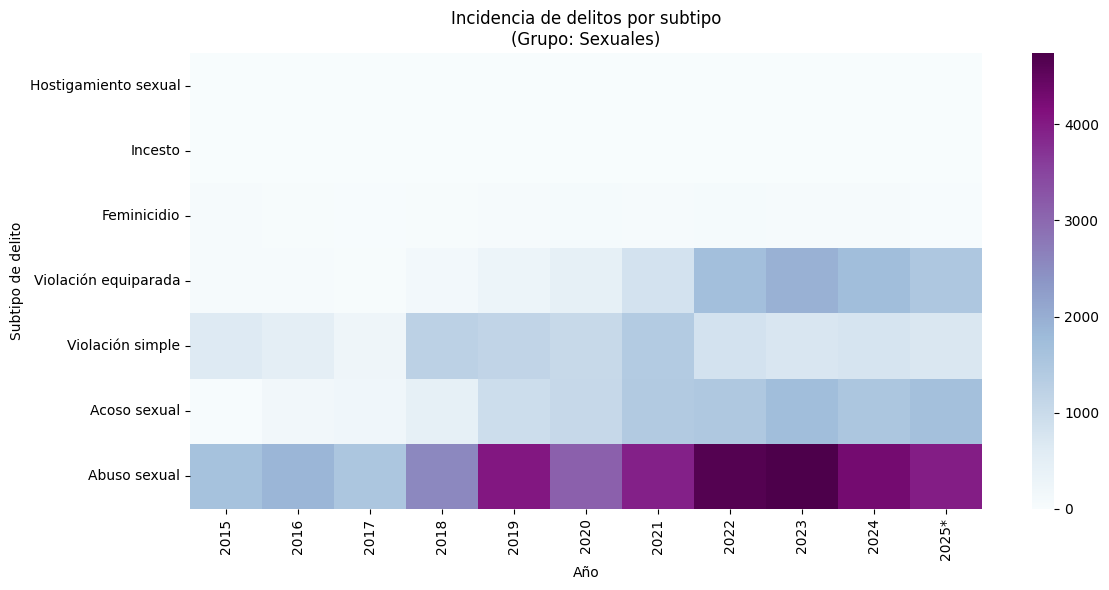

Secuestro


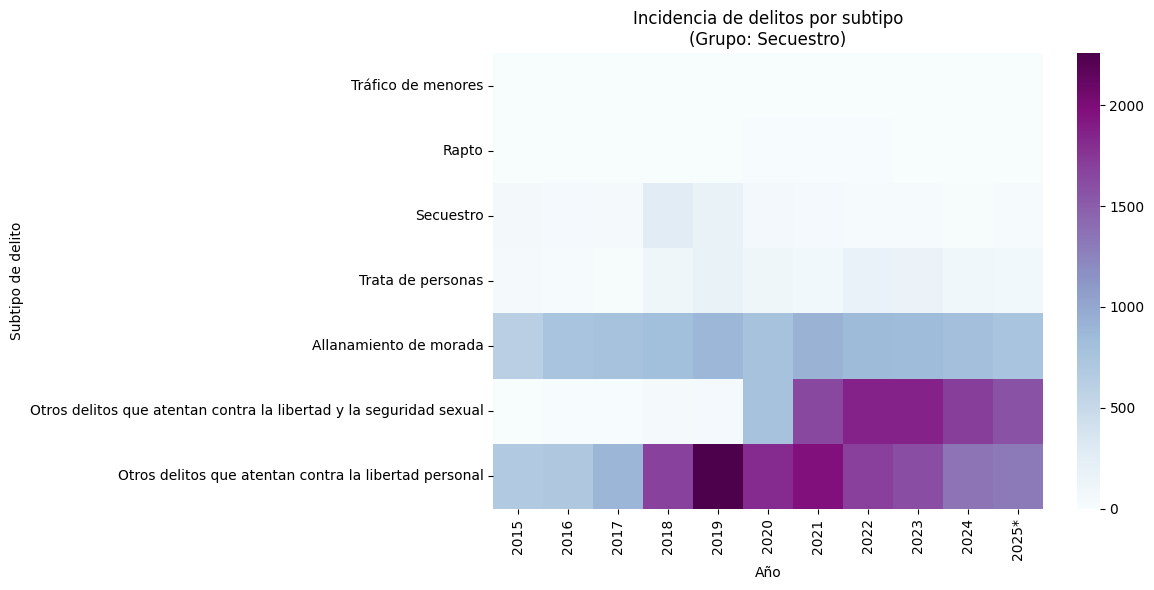

Robos


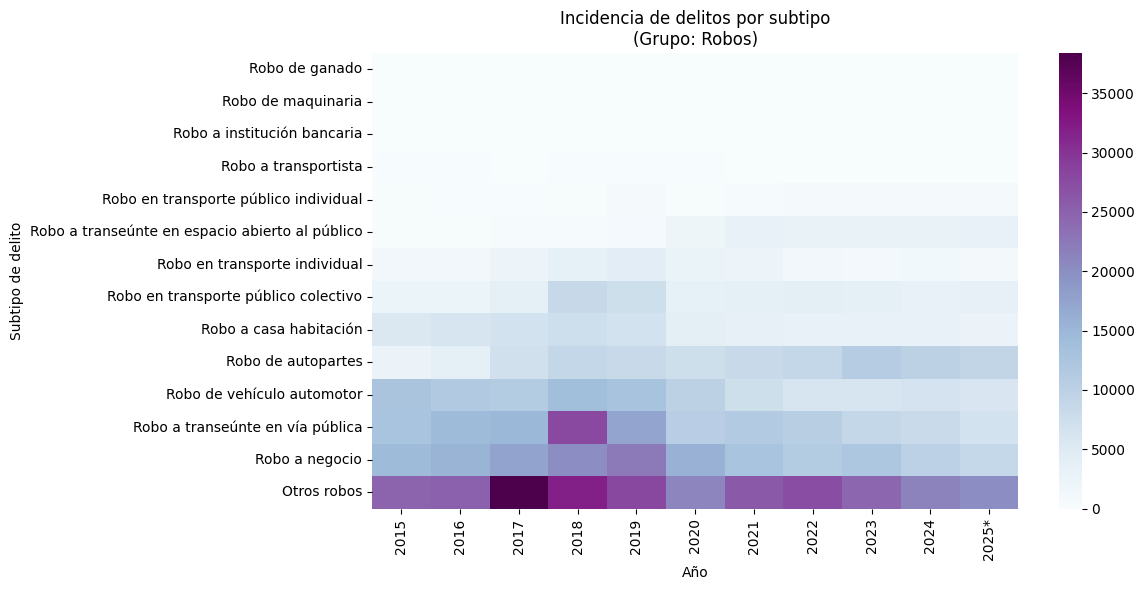

Fraude


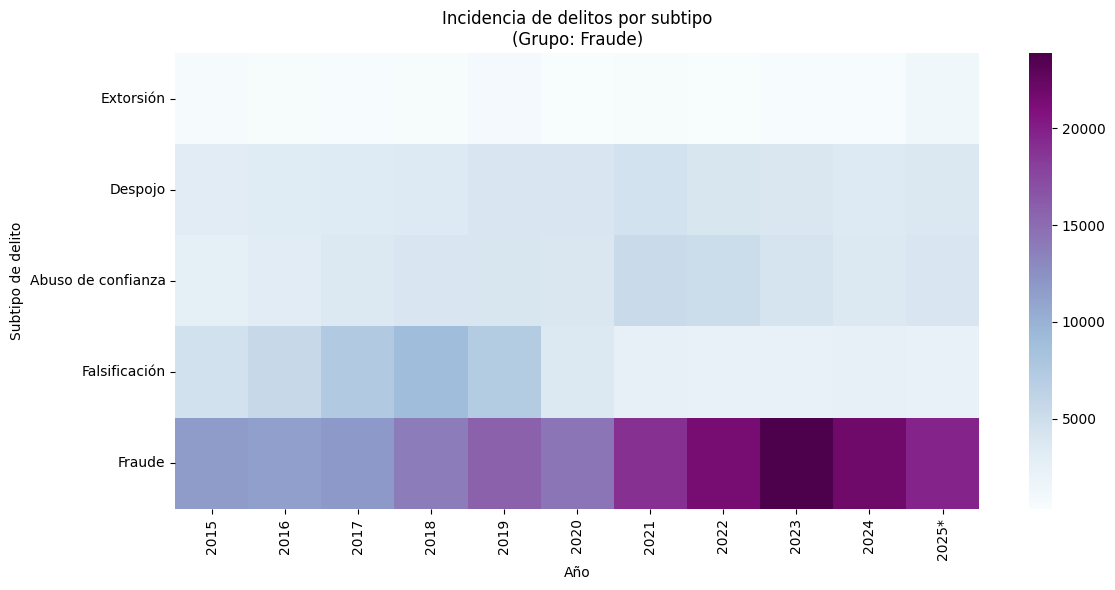

Ambiente


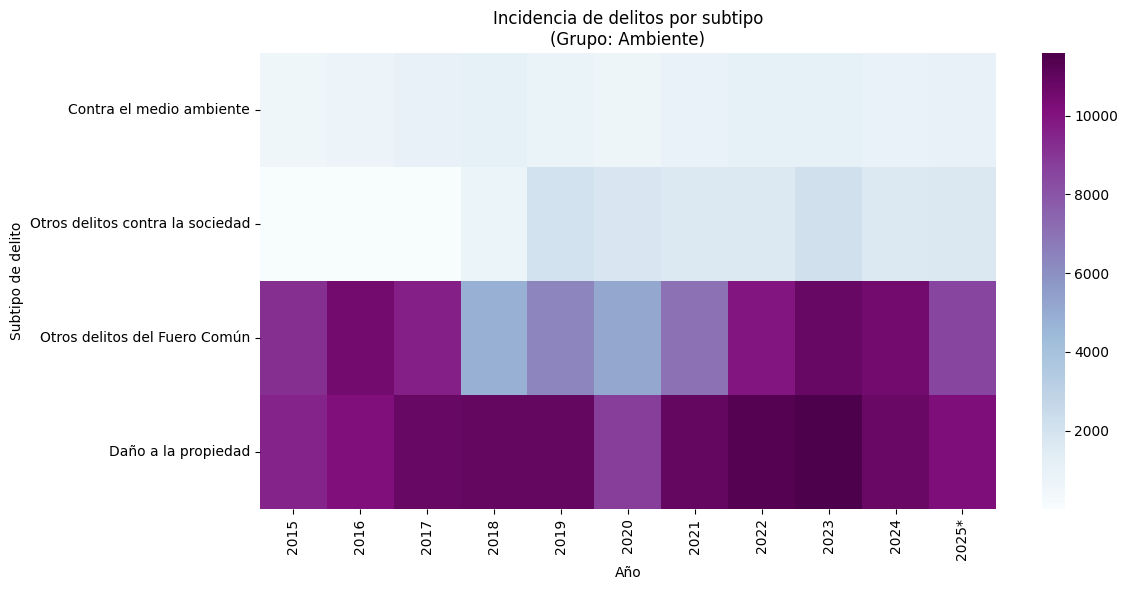

Sociales


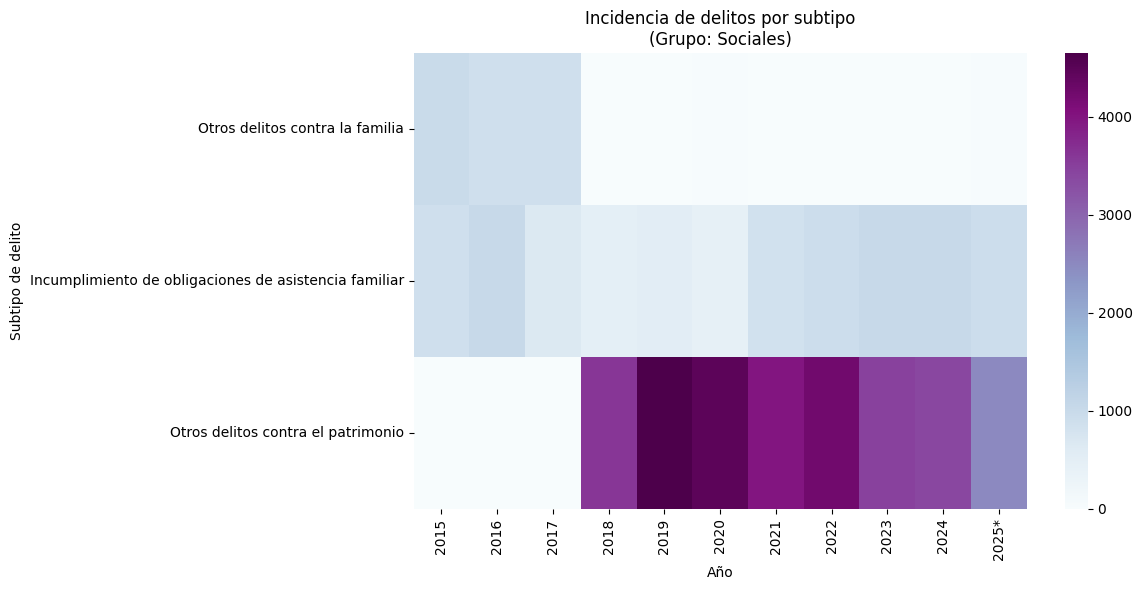

Personas


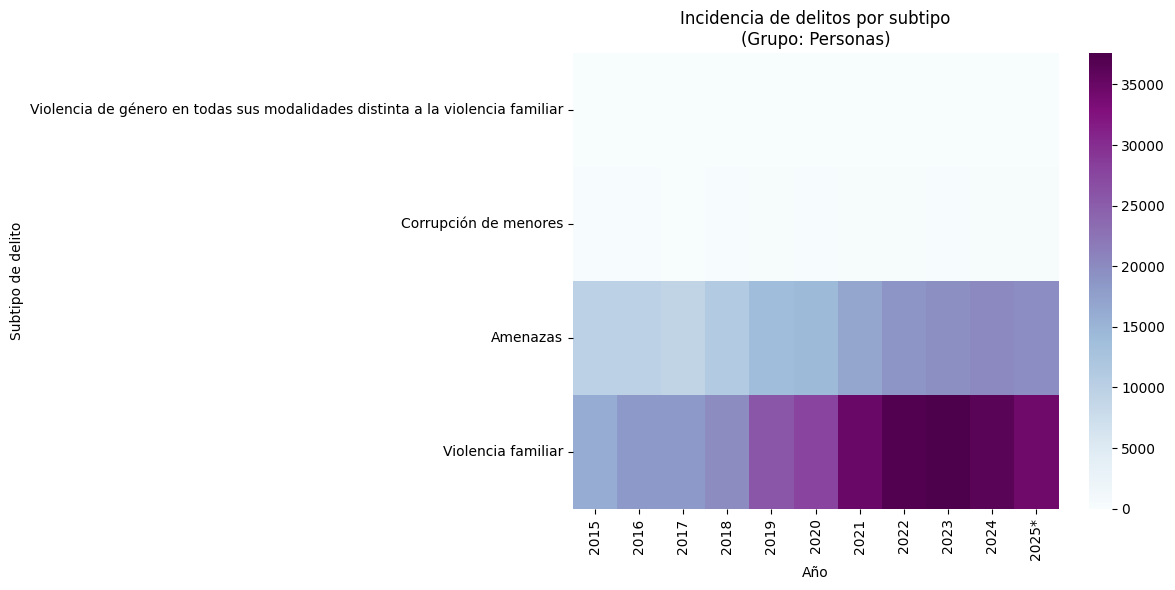

Gobierno


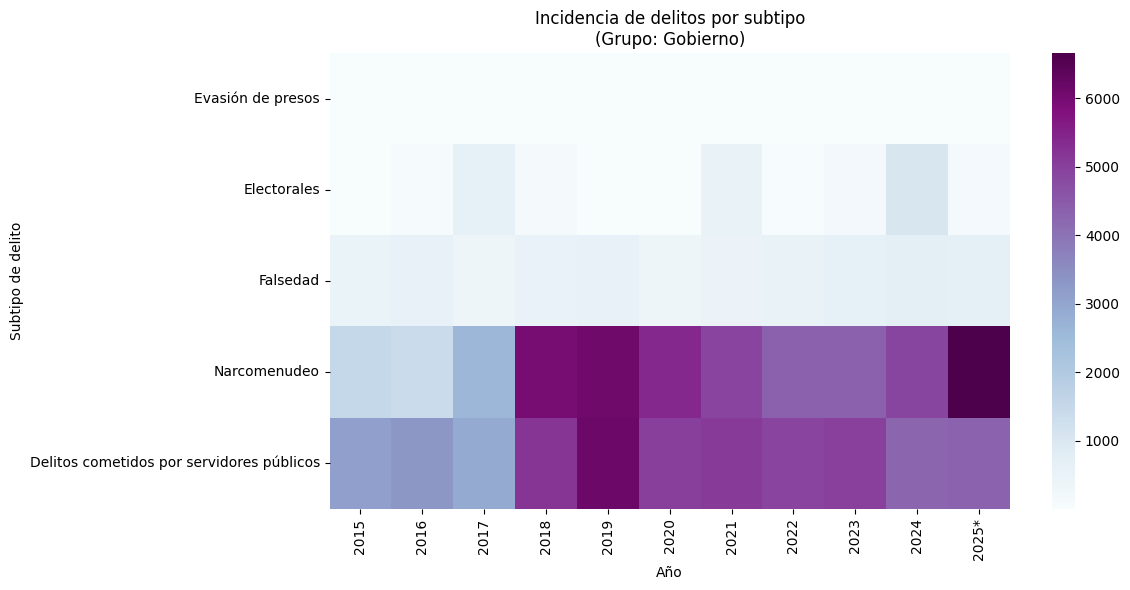

In [323]:
for grupo in delitos_cdmx["grupo_delito"].unique():
    print(grupo)
    delitos = delitos_cdmx[delitos_cdmx["grupo_delito"] == grupo][["A√±o", "Subtipo de delito", "Total"]].groupby(["A√±o", "Subtipo de delito"]).sum().unstack().droplevel(axis=1, level=0).T
    delitos[2025] = delitos[2025] * 2
    columns = list(delitos.columns)
    columns[-1] = "2025*"
    delitos.columns = columns
    delitos["Total"] = delitos.sum(axis=1)
    delitos = delitos.sort_values("Total")
    delitos = delitos.iloc[:, :-1]
    # print(delitos)
    pyplot.figure(figsize=(12, 6))
    seaborn.heatmap(delitos, cmap="BuPu")
    pyplot.title(f"Incidencia de delitos por subtipo\n(Grupo: {grupo})")
    pyplot.xlabel("A√±o")
    pyplot.xticks(rotation=90)
    pyplot.tight_layout()
    pyplot.savefig(f"figuras/delitos_{grupo.lower()}_general.png")
    pyplot.show()
    print("=" * 80)


> Concentrado para grupo de delitos (Por A√±o)

Homicidios


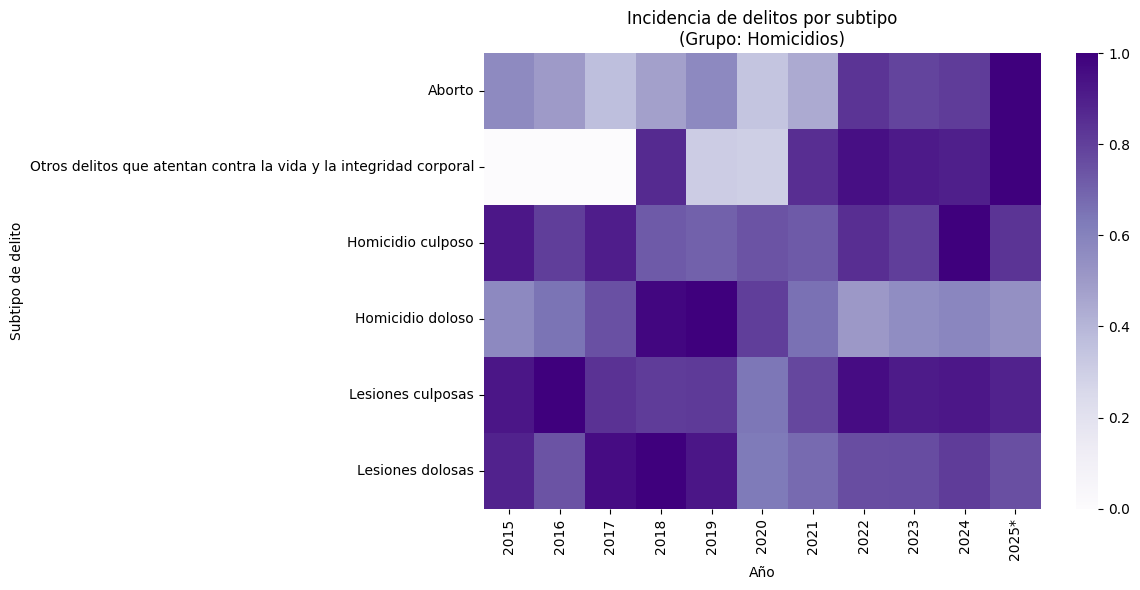

Sexuales


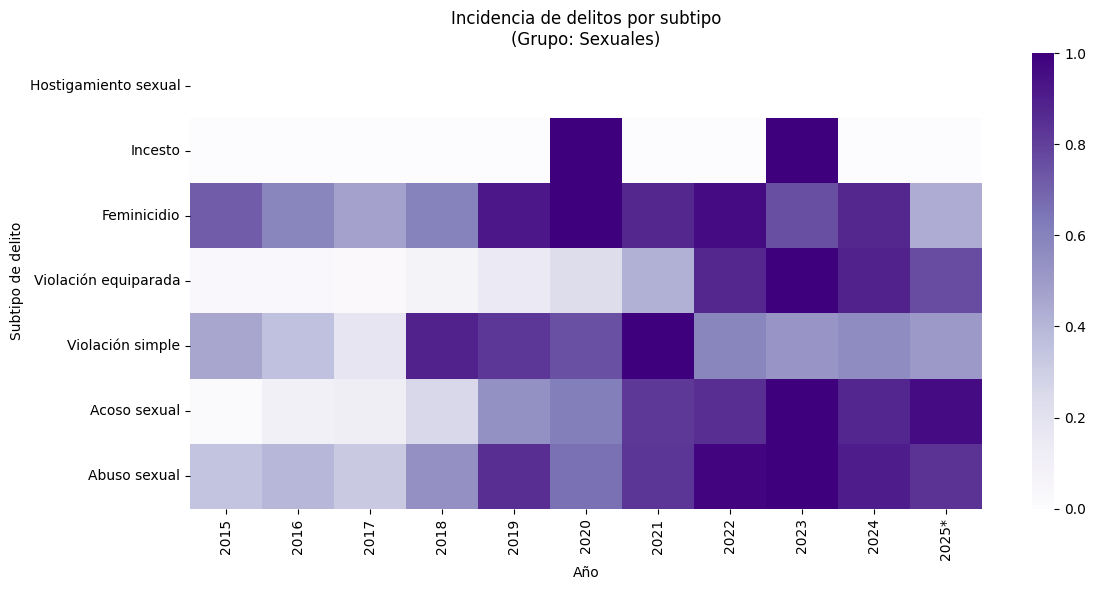

Secuestro


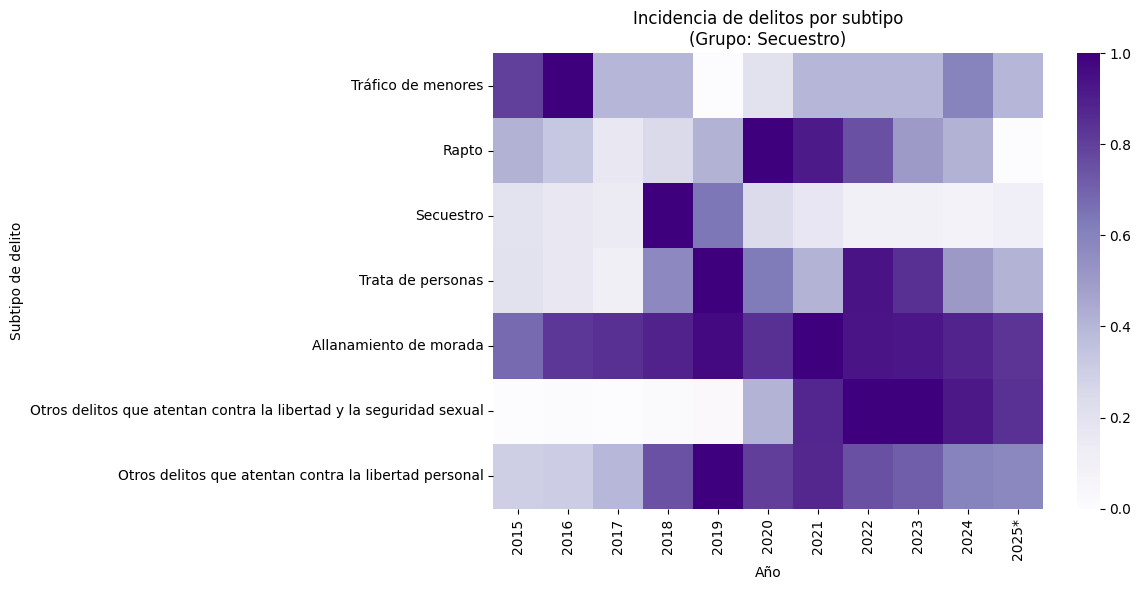

Robos


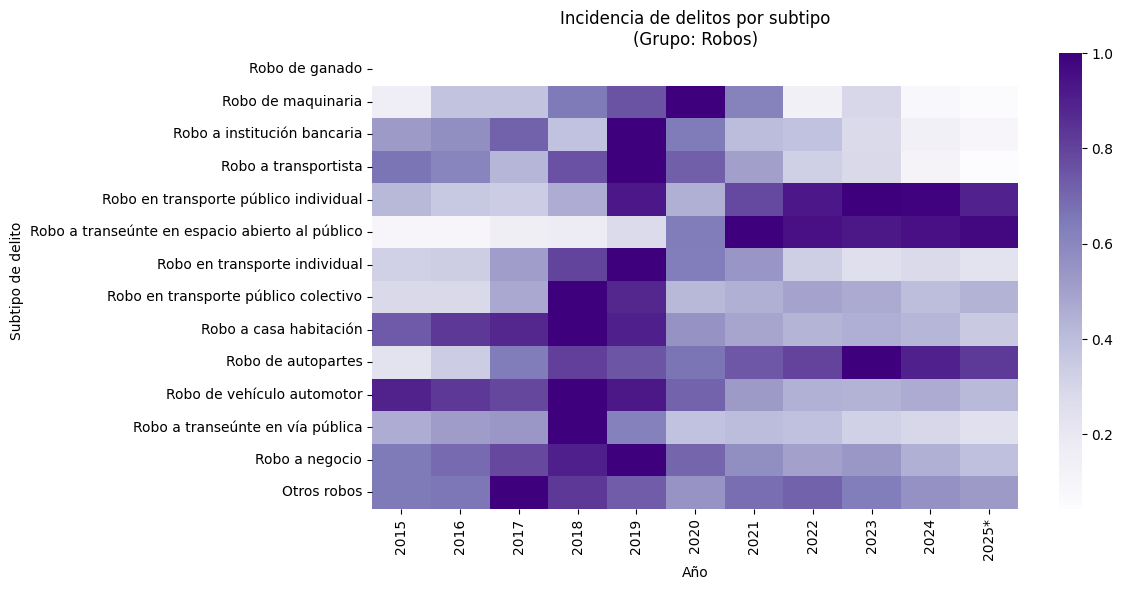

Fraude


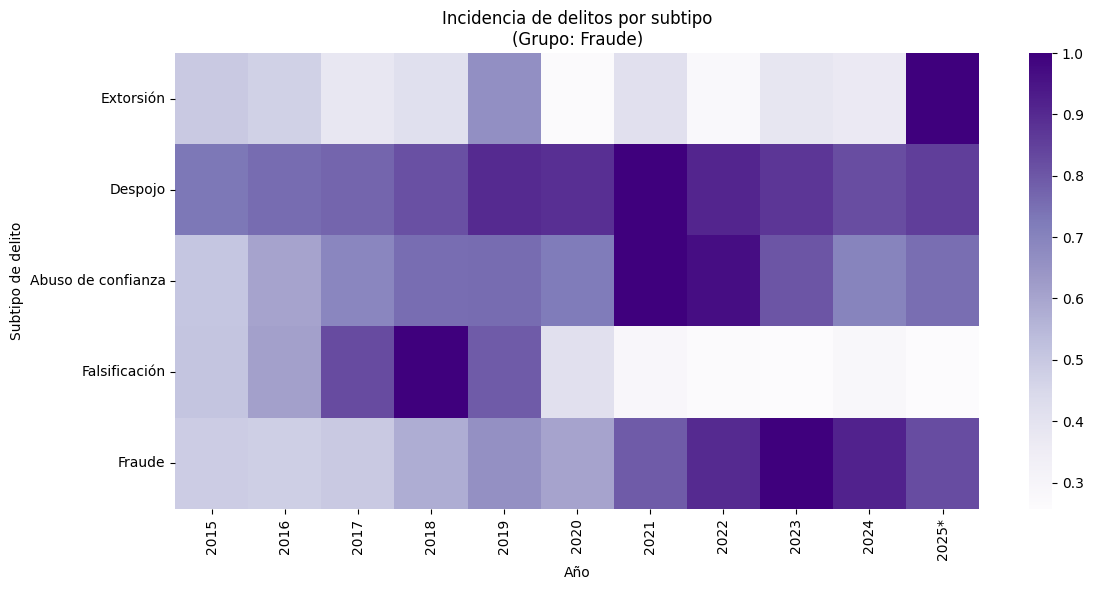

Ambiente


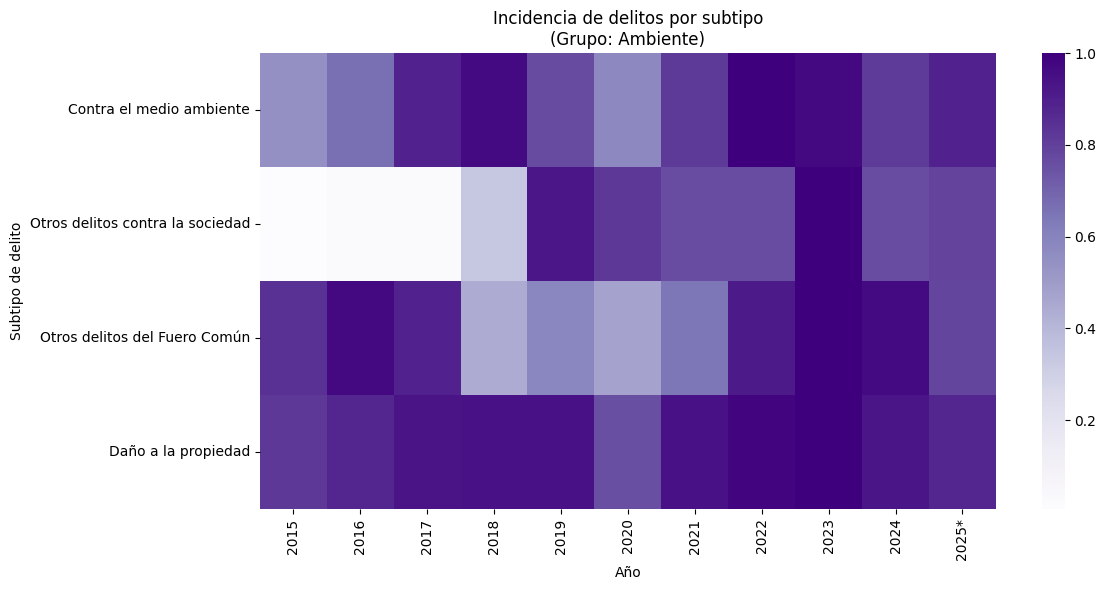

Sociales


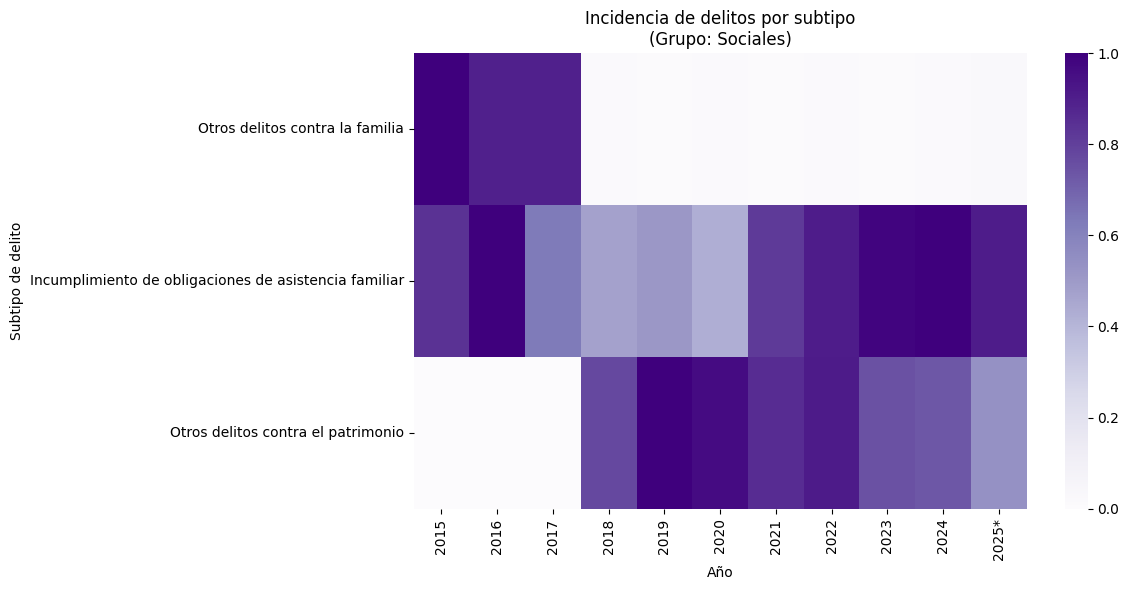

Personas


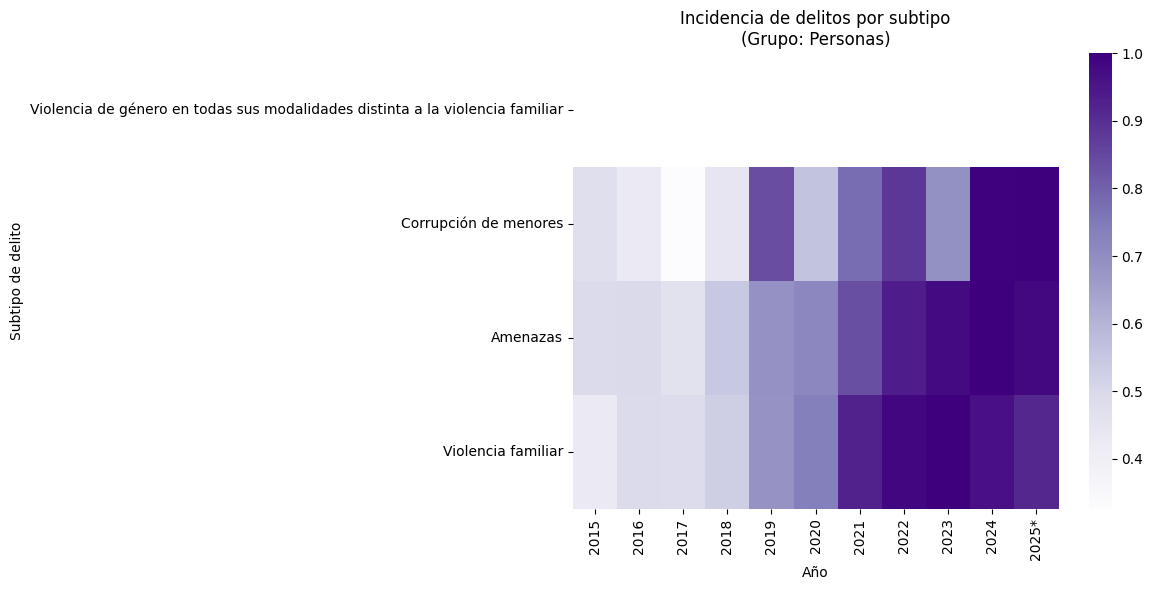

Gobierno


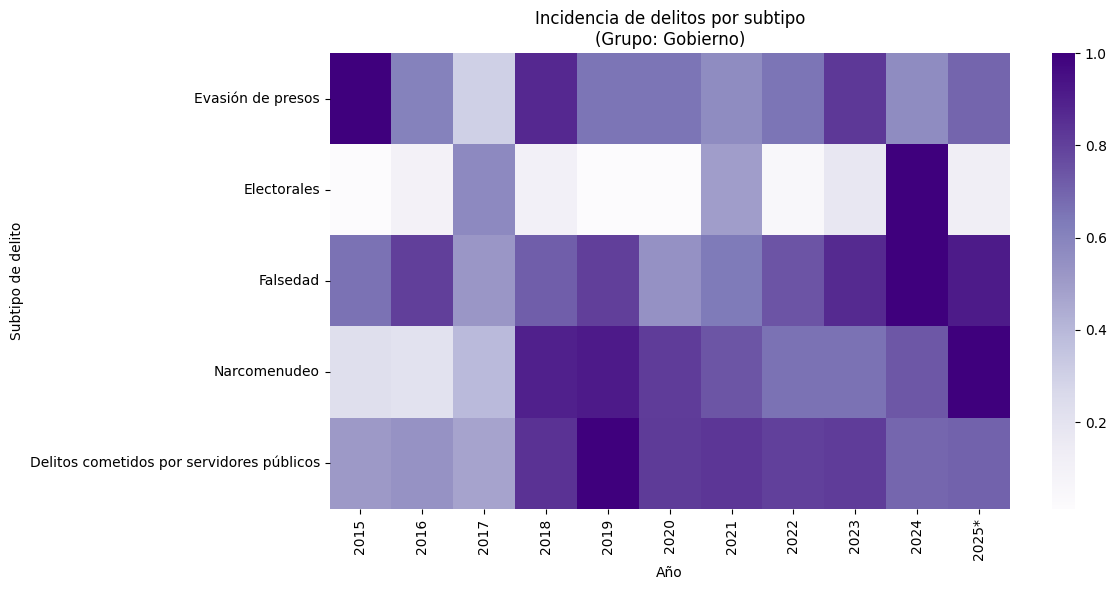

In [324]:
for grupo in delitos_cdmx["grupo_delito"].unique():
    print(grupo)
    delitos = delitos_cdmx[delitos_cdmx["grupo_delito"] == grupo][["A√±o", "Subtipo de delito", "Total"]].groupby(["A√±o", "Subtipo de delito"]).sum().unstack().droplevel(axis=1, level=0).T
    delitos[2025] = delitos[2025] * 2
    columns = list(delitos.columns)
    columns[-1] = "2025*"
    delitos.columns = columns
    delitos["Total"] = delitos.sum(axis=1)
    delitos = delitos.sort_values("Total")
    delitos = delitos.iloc[:, :-1]
    delitos = delitos.div(delitos.max(axis=1), axis=0)
    # print(delitos)
    pyplot.figure(figsize=(12, 6))
    seaborn.heatmap(delitos, cmap="Purples")
    pyplot.title(f"Incidencia de delitos por subtipo\n(Grupo: {grupo})")
    pyplot.xlabel("A√±o")
    pyplot.xticks(rotation=90)
    pyplot.tight_layout()
    pyplot.savefig(f"figuras/delitos_{grupo.lower()}_a√±o.png")
    pyplot.show()
    print("=" * 80)


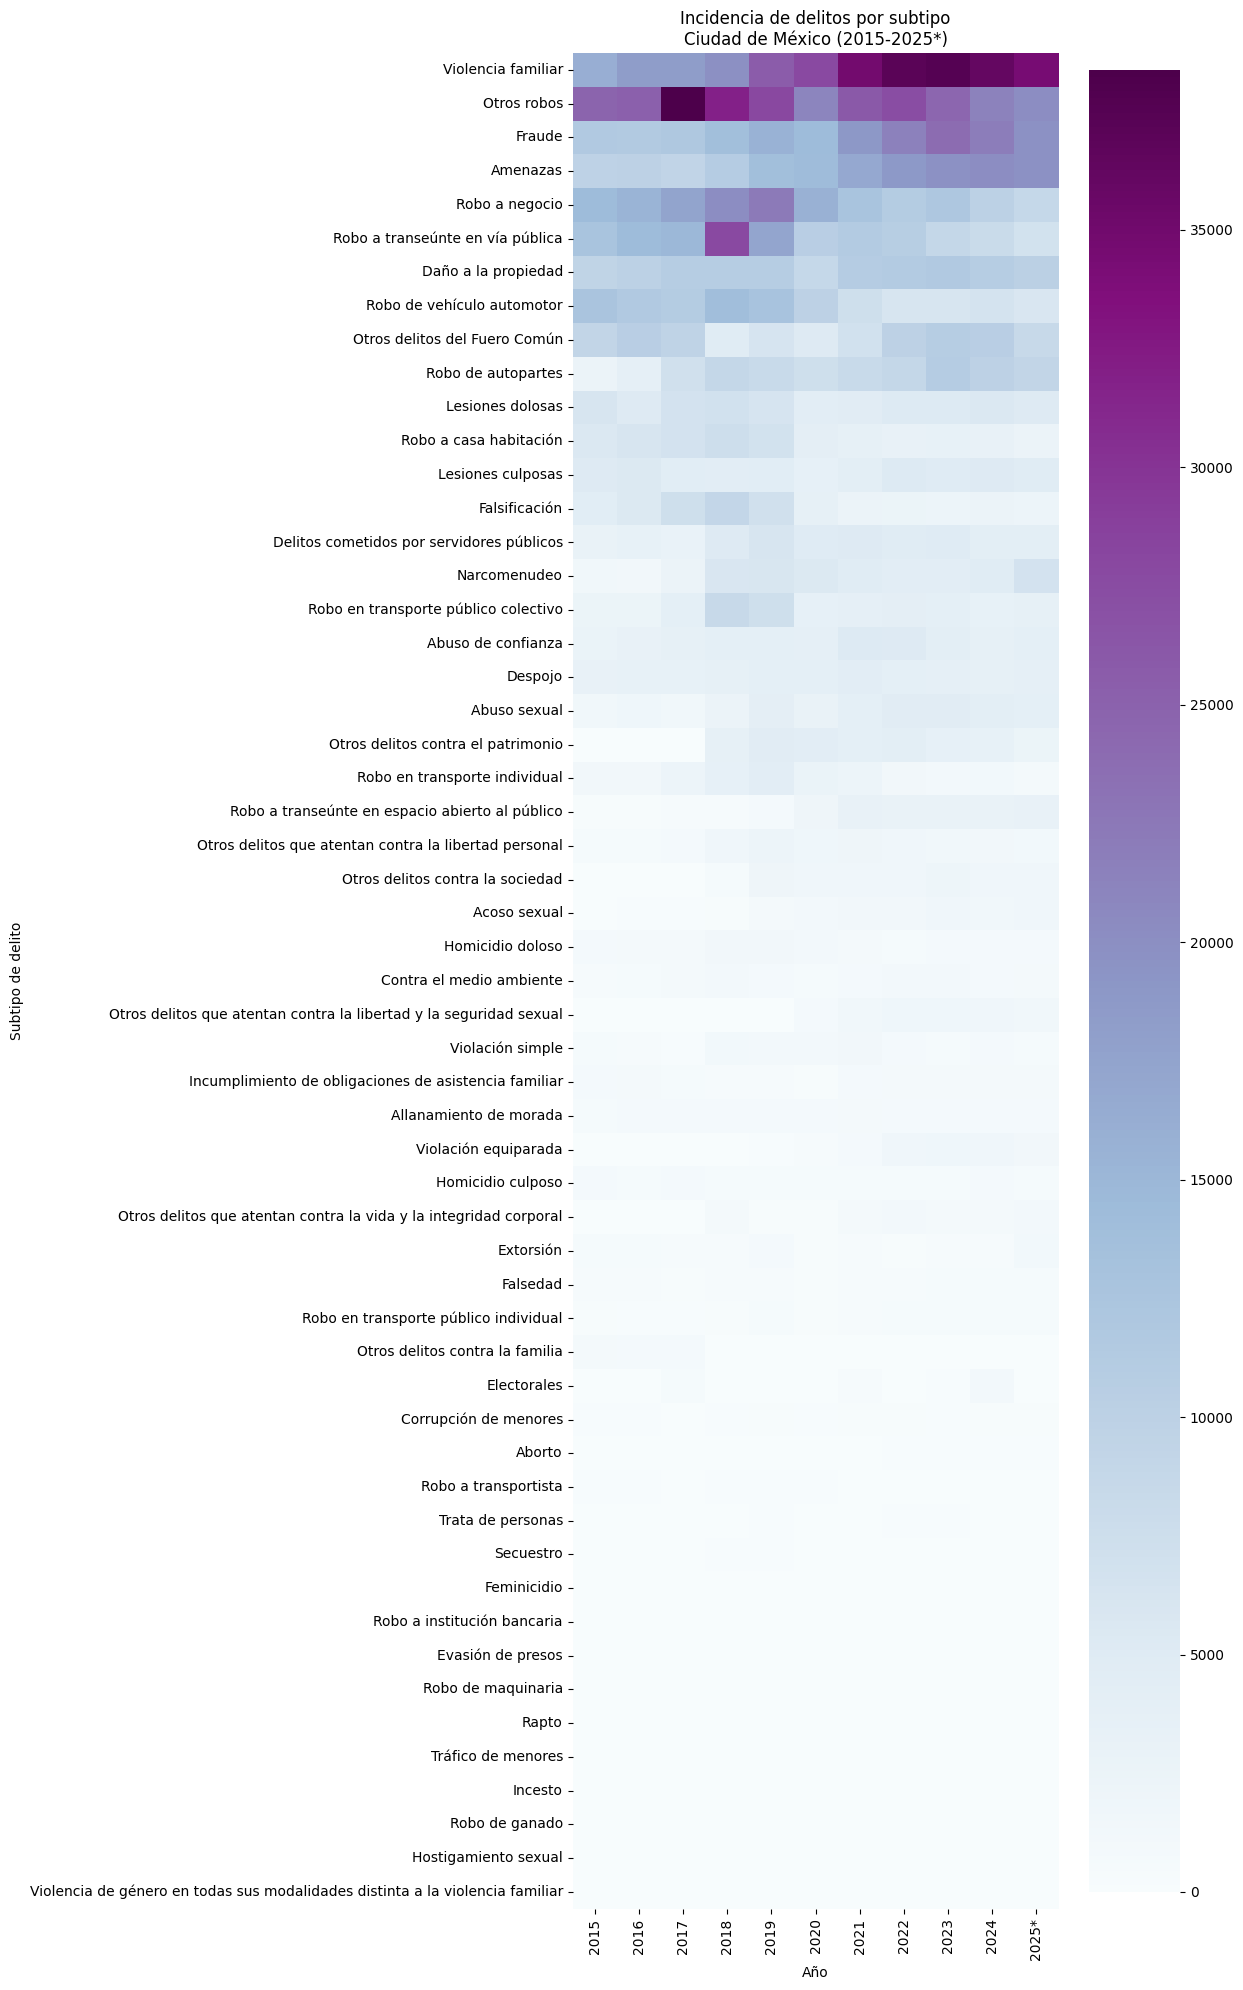

In [ ]:
reporte10 = delitos_cdmx[["A√±o", "Subtipo de delito", "Total"]].groupby(["A√±o", "Subtipo de delito"]).sum().unstack().droplevel(axis=1, level=0).T
reporte10[2025] = reporte10[2025] * 2
columns = list(reporte10.columns)
years = pandas.Series(columns)
columns[-1] = "2025*"
reporte10.columns = columns
reporte10p = reporte10.copy()
# reporte10p = reporte10p.div(reporte10.max(axis=1), axis=0)
reporte10p["Total"] = reporte10p.sum(axis=1)
# reporte10["Total"] = reporte10.add(1).multiply(years - 2014).sum()
reporte10p = reporte10p.sort_values("Total", ascending=False)
reporte10p = reporte10p.iloc[:, :-1]
reporte10 = reporte10.loc[reporte10p.index]
pyplot.figure(figsize=(12, 20))
seaborn.heatmap(reporte10, cmap="BuPu")
pyplot.title(f"Incidencia de delitos por subtipo\nCiudad de M√©xico (2015-2025*)")
pyplot.xlabel("A√±o")
pyplot.xticks(rotation=90)
pyplot.tight_layout()
pyplot.savefig(f"figuras/reporte10.png")
pyplot.show()

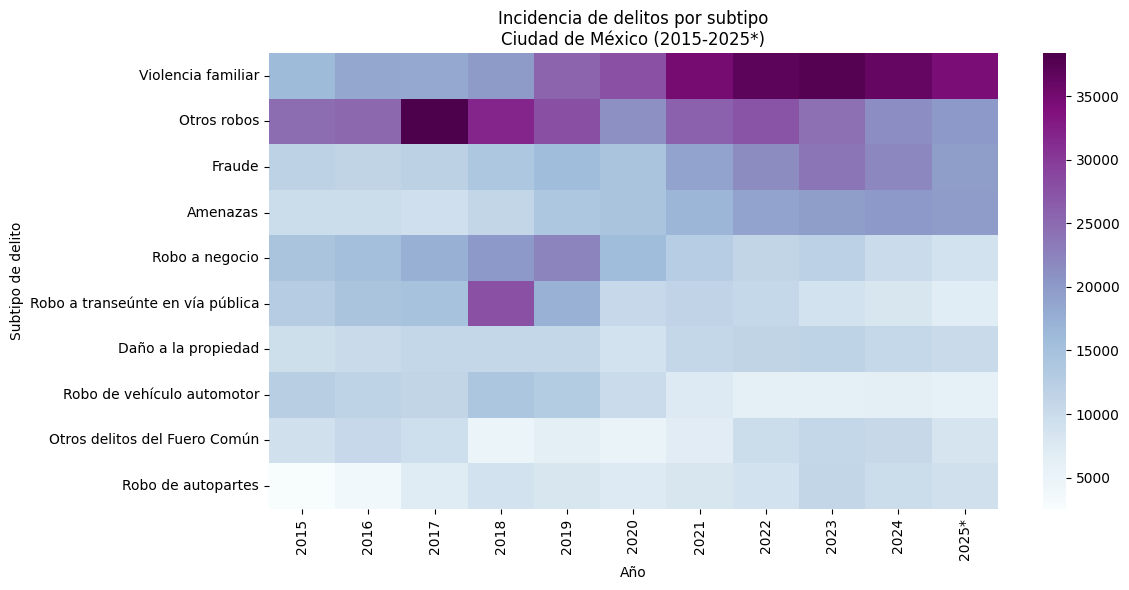

In [358]:
reporte10b = delitos_cdmx[["A√±o", "Subtipo de delito", "Total"]].groupby(["A√±o", "Subtipo de delito"]).sum().unstack().droplevel(axis=1, level=0).T
reporte10b[2025] = reporte10b[2025] * 2
columns = list(reporte10b.columns)
years = pandas.Series(columns)
columns[-1] = "2025*"
reporte10b.columns = columns
reporte10bp = reporte10b.copy()
# reporte10bp = reporte10bp.div(reporte10b.max(axis=1), axis=0)
reporte10bp["Total"] = reporte10bp.sum(axis=1)
# reporte10b["Total"] = reporte10b.add(1).multiply(years - 2014).sum()
reporte10bp = reporte10bp.sort_values("Total", ascending=False)
reporte10bp = reporte10bp.iloc[:, :-1]
reporte10b = reporte10b.loc[reporte10bp.index]
pyplot.figure(figsize=(12, 6))
seaborn.heatmap(reporte10b.head(10), cmap="BuPu")
pyplot.title(f"Incidencia de delitos por subtipo\nCiudad de M√©xico (2015-2025*)")
pyplot.xlabel("A√±o")
pyplot.xticks(rotation=90)
pyplot.tight_layout()
pyplot.savefig(f"figuras/reporte10b.png")
pyplot.show()

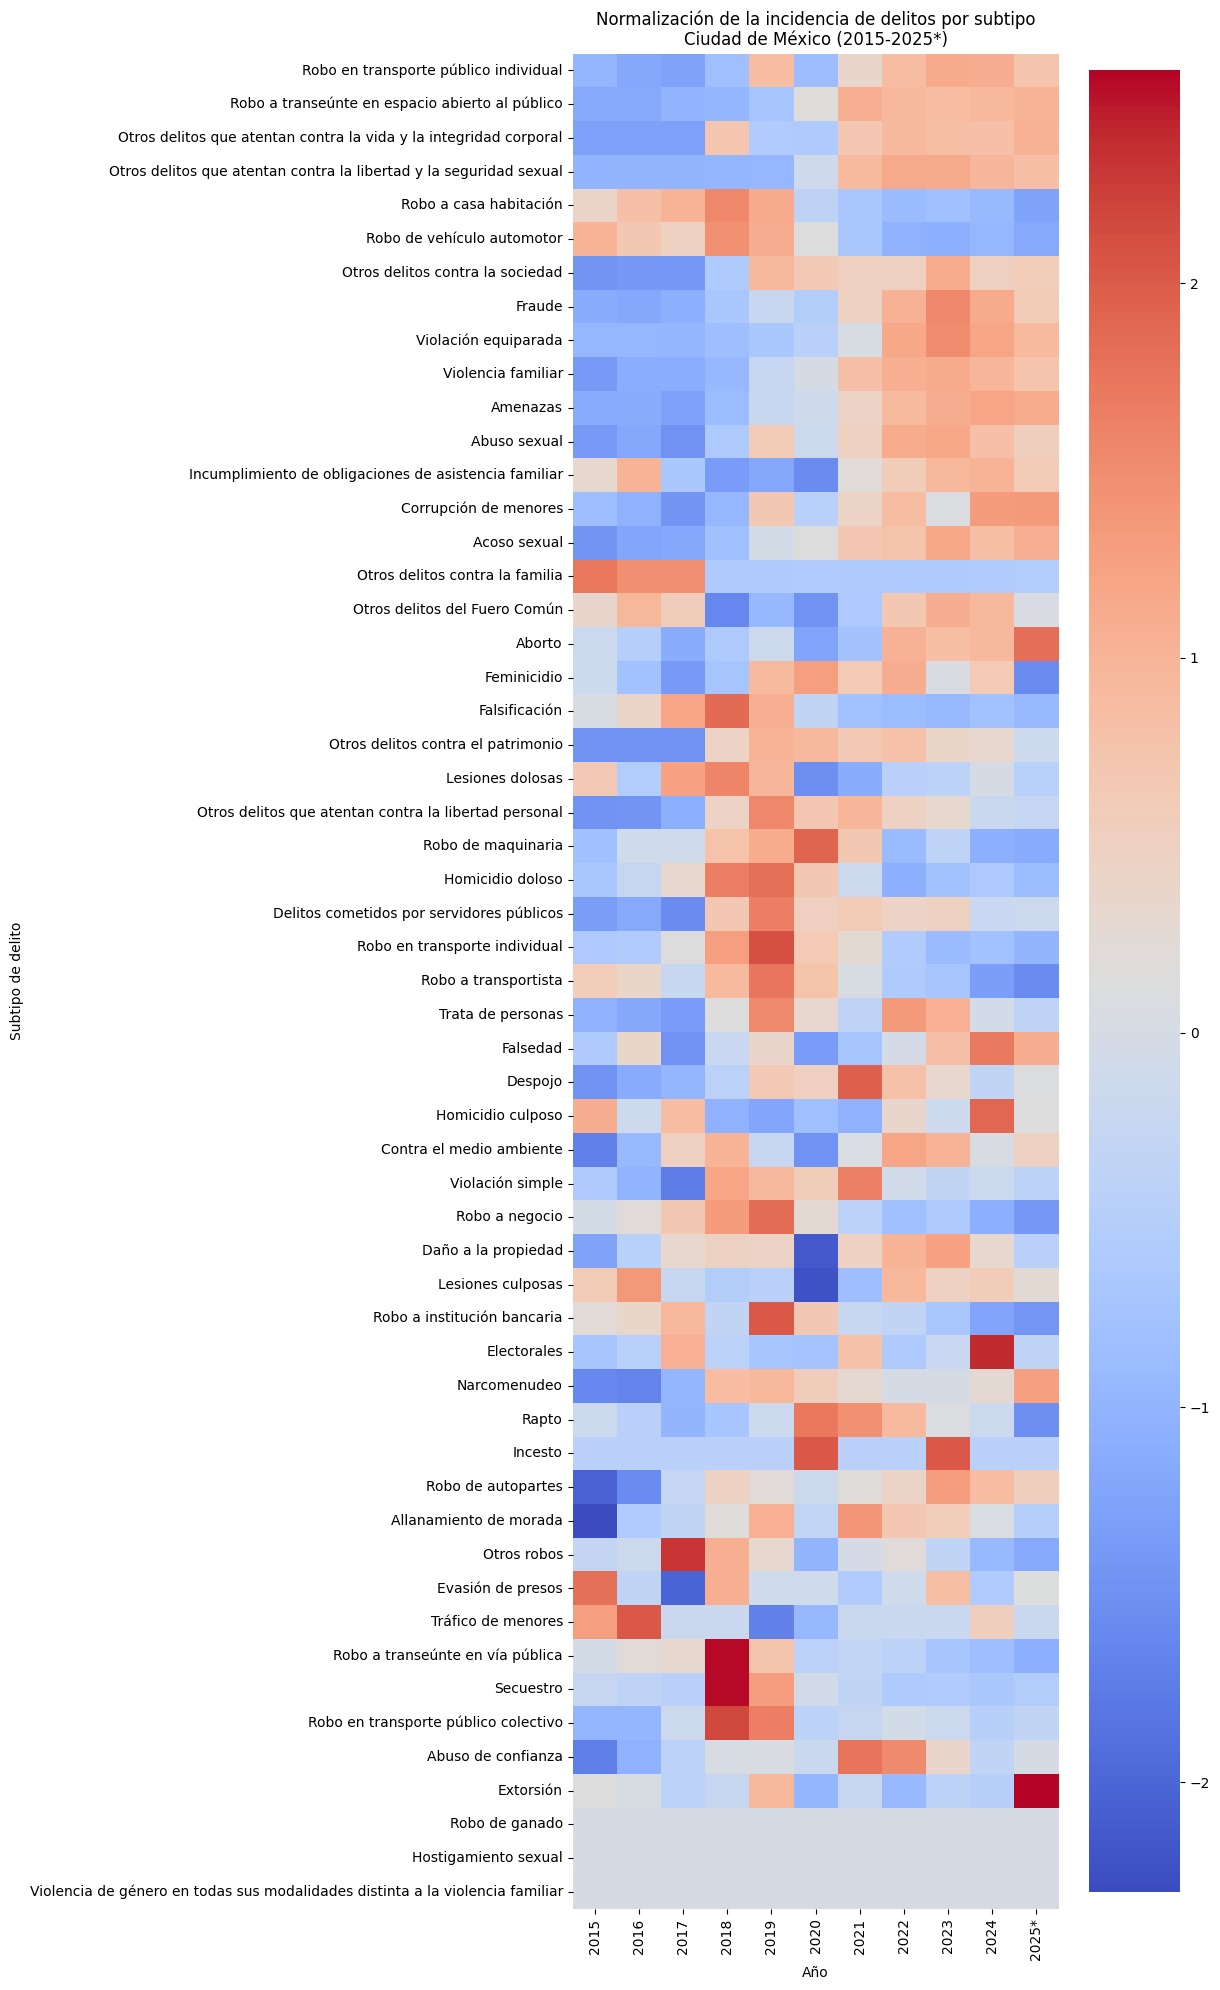

In [379]:
reporte11 = delitos_cdmx[["A√±o", "Subtipo de delito", "Total"]].groupby(["A√±o", "Subtipo de delito"]).sum().unstack().droplevel(axis=1, level=0).T
reporte11[2025] = reporte11[2025] * 2
columns = list(reporte11.columns)
years = pandas.Series(columns)
columns[-1] = "2025*"
reporte11.columns = columns
reporte11p = reporte11.copy()
# reporte11p = reporte11p.div(reporte11.sum(axis=1), axis=0)
reporte11p = (reporte11 - reporte11.mean(axis=1).values[:, None]) / reporte11.std(axis=1).values[:, None]
# reporte11p["Total"] = reporte11p.abs().sum(axis=1) +  reporte11p.abs().sum(axis=1) * (reporte11p.sum(axis=1) > 0) * 100
reporte11p["Total"] = reporte11p.abs().sum(axis=1)
# reporte11["Total"] = reporte11.add(1).multiply(years - 2014).sum()
reporte11p = reporte11p.fillna(0).sort_values("Total", ascending=False)
reporte11p = reporte11p.iloc[:, :-1]
reporte11 = reporte11.loc[reporte11p.index]
pyplot.figure(figsize=(12, 20))
seaborn.heatmap(reporte11p, cmap="coolwarm")
pyplot.title(f"Normalizaci√≥n de la incidencia de delitos por subtipo\nCiudad de M√©xico (2015-2025*)")
pyplot.xlabel("A√±o")
pyplot.xticks(rotation=90)
pyplot.tight_layout()
pyplot.savefig(f"figuras/reporte11.png")
pyplot.show()